In [47]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set2", len(package_domains_watt))

def format_csv(path : str):
    dataset_input  = pd.read_csv(path)
    domains_unique = dataset_input['domain'].unique()
    output_dict = {'timestamp':list()}
    for domain in domains_unique: output_dict[domain]=list()
    for timestamp in dataset_input['timestamp'].unique():
        x = dataset_input.loc[dataset_input['timestamp'] == timestamp]
        output_dict['timestamp'].append(timestamp)
        for domain in domains_unique: 
            serie = x.loc[x['domain'] == domain]['measure']
            output_dict[domain].append(serie.iloc[0]) if len(serie)>0 else output_dict[domain].append(None)
    return pd.DataFrame(output_dict)

def merge_datasets(input_datasets : dict):
    for name, dataset in input_datasets.items(): dataset['dataset'] = name
    return pd.concat(input_datasets.values())

def delta_from_merge(merged_dataset : pd.DataFrame, delta_between : list):
    filtered_dataset = {}
    for dataset in delta_between:
        filtered_dataset[dataset] = dataset_merged.loc[dataset_merged['dataset'] == dataset]
    
    unique_keys = list(dataset_merged.keys())
    unique_keys.remove('timestamp')
    unique_keys.remove('dataset')
    pd.set_option('mode.chained_assignment', None)
    for key in unique_keys:
        filtered_dataset[delta_between[0]][key + '_delta'] = filtered_dataset[delta_between[1]][key] - filtered_dataset[delta_between[0]][key]
        filtered_dataset[delta_between[0]][key + '_delta%'] = (filtered_dataset[delta_between[0]][key + '_delta']/filtered_dataset[delta_between[1]][key])*100

    return filtered_dataset[delta_between[0]]

# Compare DEF to SMT consolidation on tornado w/without turboboost

## scaling_driver: acpi-cpufreq

In [55]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-defall-turbo.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-defall-turbo.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-smtall-turbo.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230831-stress-smtall-turbo.csv')

dataset_turbo = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-defaultall-noturbo.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-defaultall-noturbo.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-smtall-noturbo.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/consumption-20230830-stress-smtall-noturbo.csv')

dataset_noturbo = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

Text(0.5, 1.0, 'Turboboost enabled')

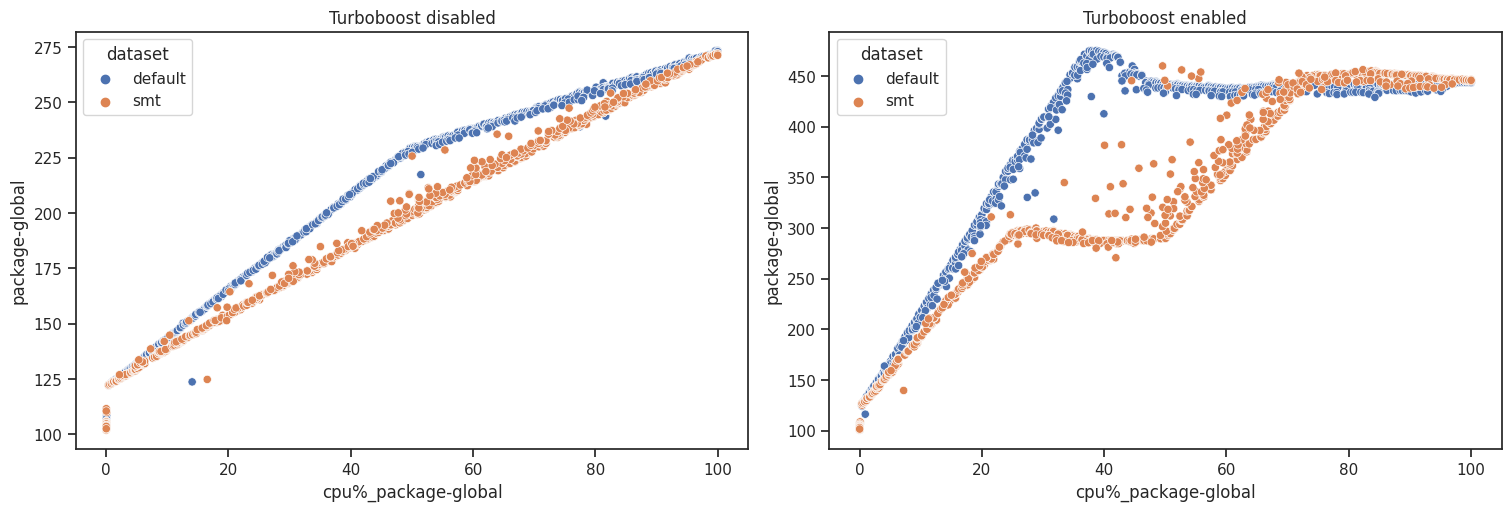

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.scatterplot(data=dataset_noturbo, x='cpu%_package-global', y='package-global', hue='dataset', ax=axs[0])
axs[0].set_title('Turboboost disabled')
sns.scatterplot(data=dataset_turbo, x='cpu%_package-global', y='package-global', hue='dataset', ax=axs[1])
axs[1].set_title('Turboboost enabled')

/tmp/ipykernel_9814/2945012057.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
/tmp/ipykernel_9814/2945012057.py:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])


[Text(0.5, 0, 'Seconds'), Text(0, 0.5, 'Watts')]

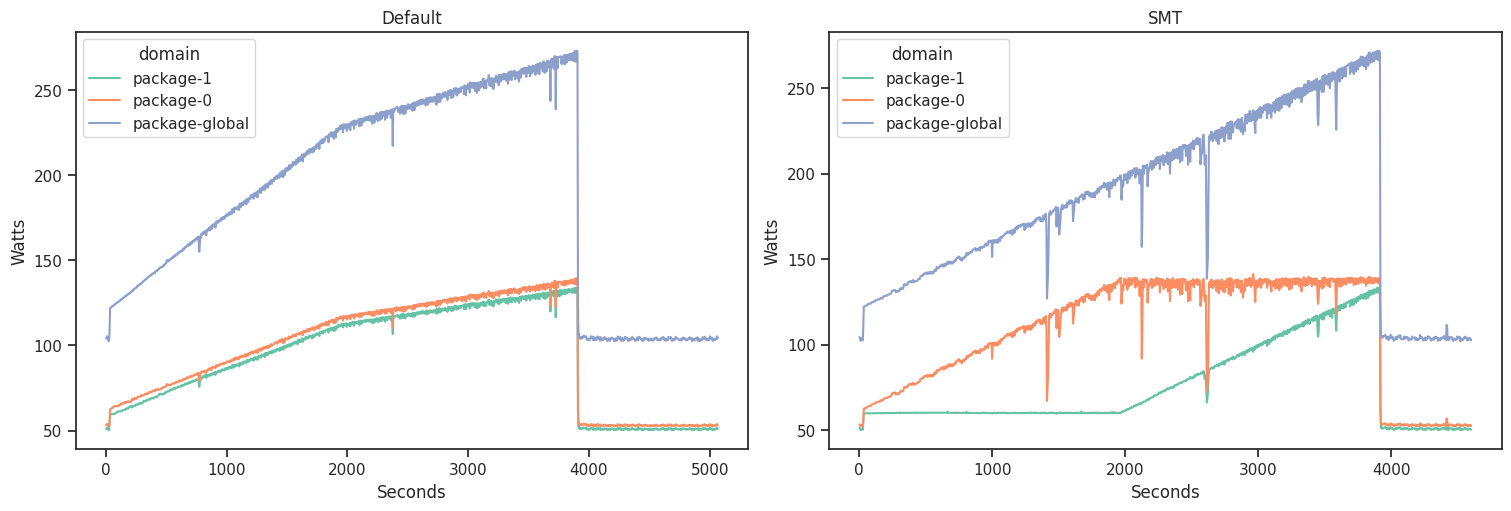

In [56]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
    
sns.set_theme(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
axs[0].set(xlabel='Seconds', ylabel='Watts')

sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')
axs[1].set(xlabel='Seconds', ylabel='Watts')

/tmp/ipykernel_9814/2945012057.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
/tmp/ipykernel_9814/2945012057.py:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])


[Text(0.5, 0, 'Seconds'), Text(0, 0.5, 'Watts')]

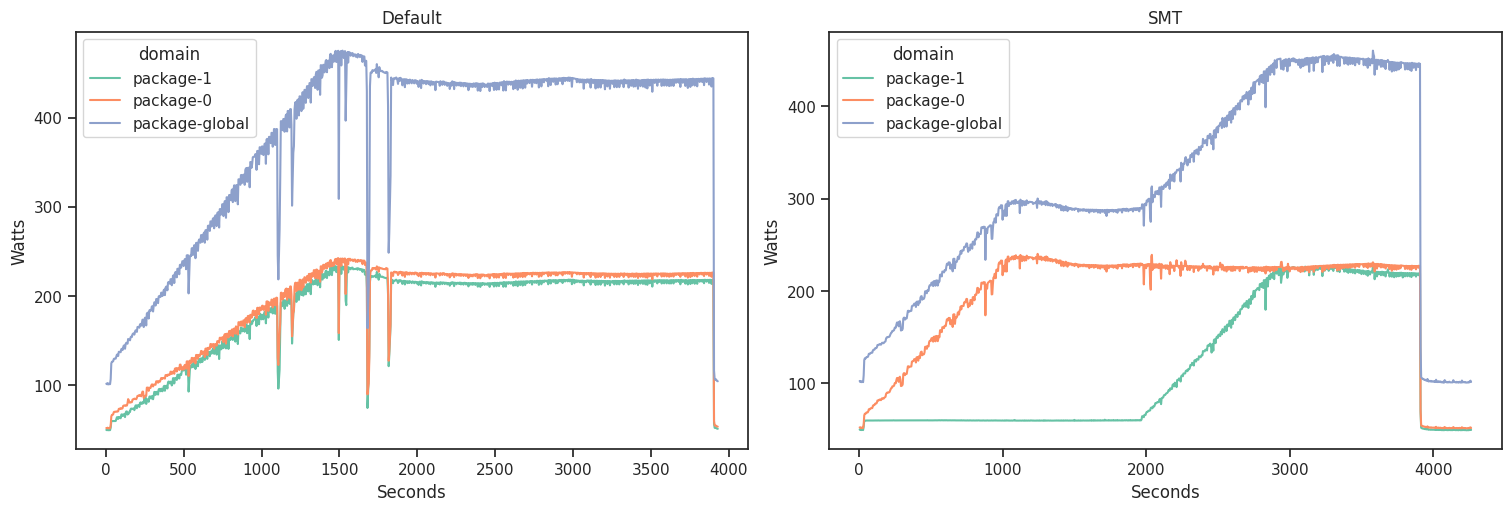

In [53]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
    
sns.set_theme(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
axs[0].set(xlabel='Seconds', ylabel='Watts')

sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')
axs[1].set(xlabel='Seconds', ylabel='Watts')

# Yeti: 4 sockets

## scaling_driver: intel_pstate turbo

In [41]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/yeti2-def.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/yeti2-def.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/yeti2-smt.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/yeti2-smt.csv')

dataset_yeti = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

<Axes: xlabel='cpu%_package-global', ylabel='package-global'>

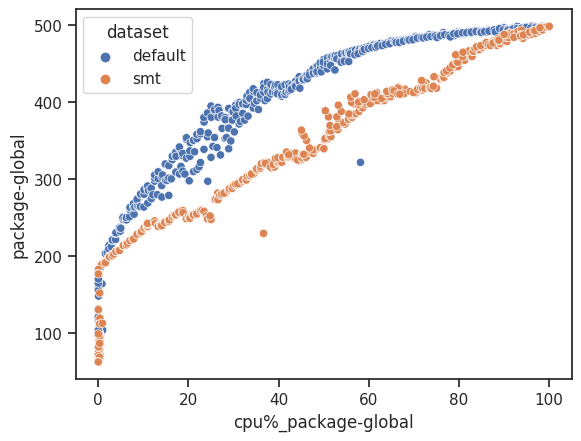

In [45]:
sns.scatterplot(data=dataset_yeti, x='cpu%_package-global', y='package-global', hue='dataset')

[Text(0.5, 0, 'Seconds'), Text(0, 0.5, 'Watts')]

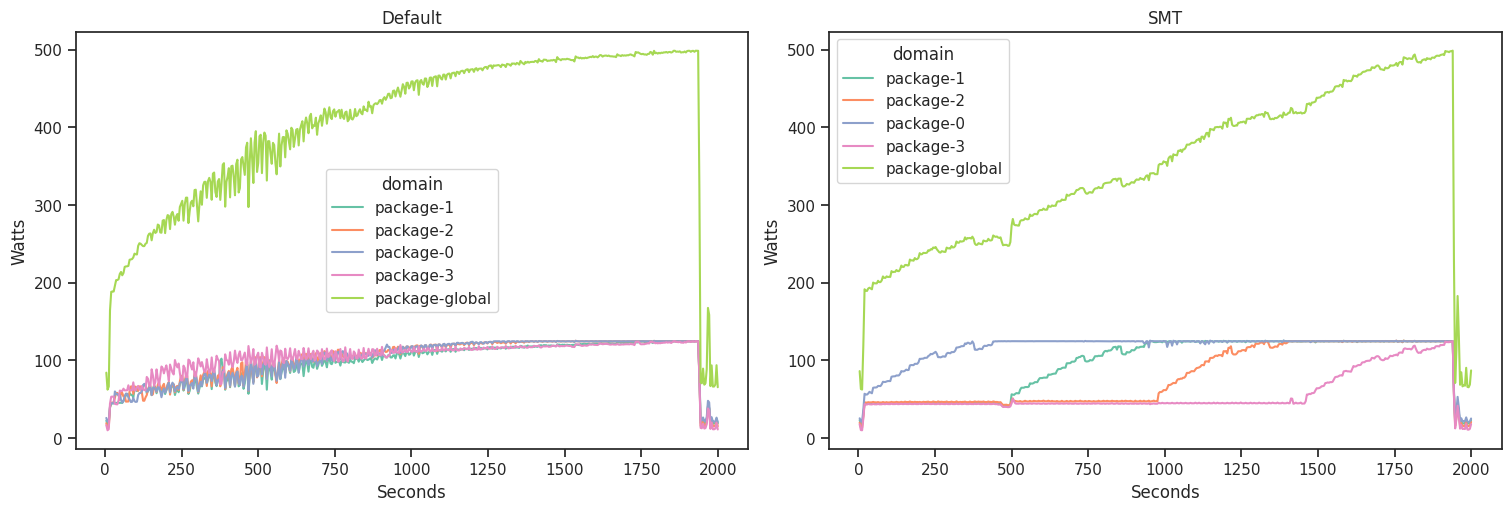

In [44]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
    
sns.set_theme(style="ticks")
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

dataset_def_raw = dataset_def_raw.drop(dataset_def_raw[dataset_def_raw['timestamp'] > 2000].index)
sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
axs[0].set(xlabel='Seconds', ylabel='Watts')

dataset_smt_raw = dataset_smt_raw.drop(dataset_smt_raw[dataset_smt_raw['timestamp'] > 2000].index)
sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')
axs[1].set(xlabel='Seconds', ylabel='Watts')

# Gros : the bad boy

## scaling_driver: intel_pstate turbo

In [38]:
dataset_def  = format_csv('/usr/local/src/rapl-reader/measures/gros87-def.csv')
dataset_def_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/gros87-def.csv')
dataset_smt = format_csv('/usr/local/src/rapl-reader/measures/gros87-smt.csv')
dataset_smt_raw = pd.read_csv('/usr/local/src/rapl-reader/measures/gros87-smt.csv')

dataset_gros = merge_datasets({'default':dataset_def, 'smt':dataset_smt})

<Axes: xlabel='cpu%_package-global', ylabel='package-global'>

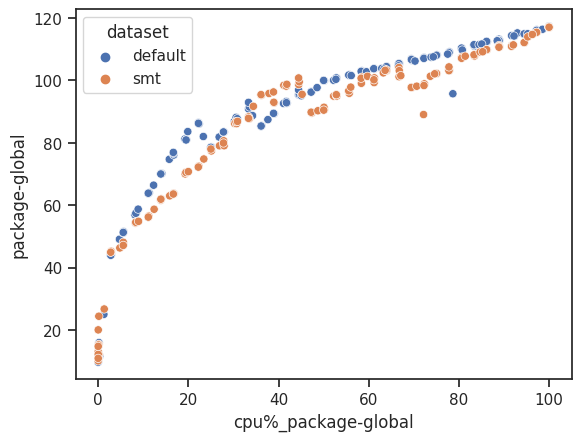

In [39]:
sns.scatterplot(data=dataset_gros, x='cpu%_package-global', y='package-global', hue='dataset')

Text(0.5, 1.0, 'SMT')

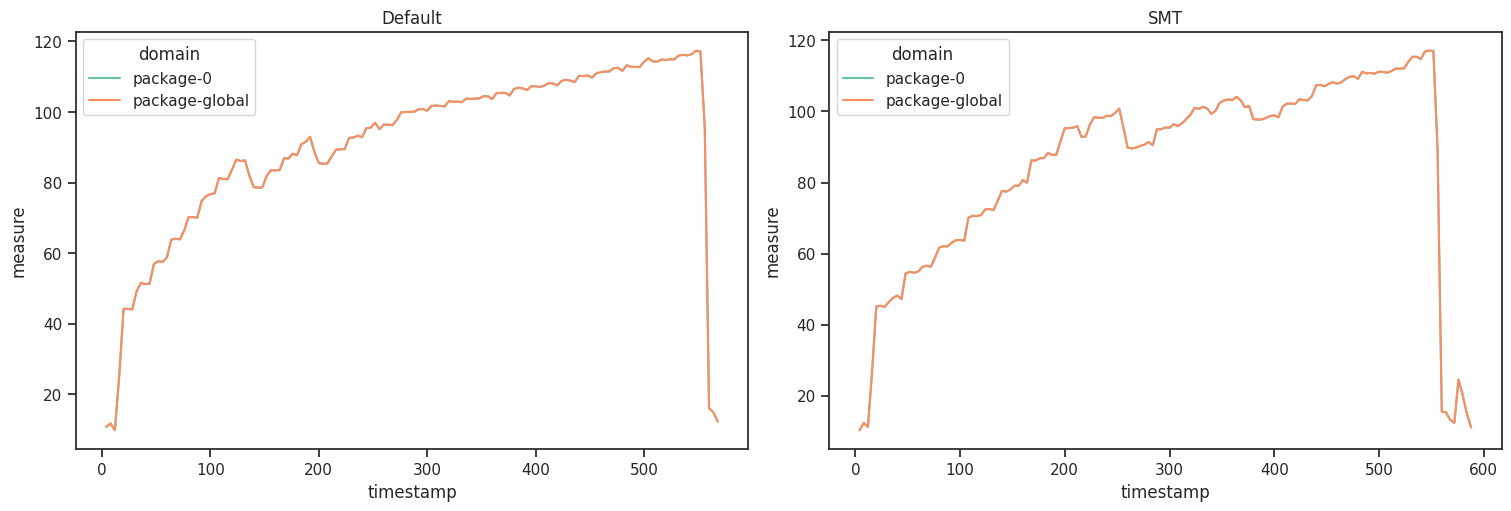

In [40]:
package_domains_watt = list()
for domain in dataset_def_raw['domain'].unique(): 
    if domain.startswith('package-'): package_domains_watt.append(domain)
    
sns.set_theme(style="ticks")
palette = sns.color_palette("Set2", len(package_domains_watt))
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')

sns.lineplot(data=dataset_def_raw.loc[dataset_def_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[0])
axs[0].set_title('Default')
sns.lineplot(data=dataset_smt_raw.loc[dataset_smt_raw['domain'].isin(package_domains_watt)], x='timestamp', y='measure', hue='domain', palette=palette, ax=axs[1])
axs[1].set_title('SMT')